In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy
from statsmodels.stats import diagnostic
from scipy import stats
from datetime import datetime
import time
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
%reload_ext autoreload

In [3]:
#import functions
from read.read_functions import *
from read.pickle_functions import *
from create_all_users import create_all_users
from create_rating_statistic import create_ratings_stat

from cleaning_functions.matched_beer import *
from cleaning_functions.rate_beer import *
from cleaning_functions.advocate import *

from compute_experts import *

In [4]:
beer_advocate_path = '../datas/BeerAdvocate/'
matched_beer_data_path = '../datas/matched_beer_data/'
rate_beer_path = '../datas/RateBeer/'

advocate_beers_path = beer_advocate_path + 'beers.csv'
advovate_breweries_path = beer_advocate_path + 'breweries.csv'
advocate_ratings_path = beer_advocate_path + 'ratings.txt'
advocate_reviews_path = beer_advocate_path + 'reviews.txt'
advocate_users_path = beer_advocate_path + 'users.csv'

matched_beer_beers = matched_beer_data_path + 'beers.csv'
matched_beer_breweries = matched_beer_data_path + 'breweries.csv'
matched_beer_ratings_ba = matched_beer_data_path + 'ratings_ba.txt'
matched_beer_ratings_rb = matched_beer_data_path + 'ratings_rb.txt'
matched_beer_ratings = matched_beer_data_path + 'ratings.csv'
matched_beer_users_approx = matched_beer_data_path + 'users_approx.csv'
matched_beer_users = matched_beer_data_path + 'users.csv'

rate_beer_beers = rate_beer_path + 'beers.csv'
rate_beer_breweries = rate_beer_path + 'breweries.csv'
rate_beer_users = rate_beer_path + 'users.csv'


In [5]:
beer_advocate_path = '../datas/BeerAdvocate/pickle/'
matched_beer_data_path = '../datas/matched_beer_data/pickle'
rate_beer_path = '../datas/RateBeer/pickle'

advocate_beers_path_pickle = beer_advocate_path + 'beers.csv'
advovate_breweries_path_pickle = beer_advocate_path + 'breweries.csv'
advocate_ratings_path_pickle = beer_advocate_path + 'ratings.txt'
advocate_reviews_path_pickle = beer_advocate_path + 'reviews.txt'
advocate_users_path_pickle = beer_advocate_path + 'users.csv'

matched_beer_beers_pickle = matched_beer_data_path + 'beers.csv'
matched_beer_breweries_pickle = matched_beer_data_path + 'breweries.csv'
matched_beer_ratings_ba_pickle = matched_beer_data_path + 'ratings_ba.txt'
matched_beer_ratings_rb_pickle = matched_beer_data_path + 'ratings_rb.txt'
matched_beer_ratings_pickle = matched_beer_data_path + 'ratings.csv'
matched_beer_users_approx_pickle = matched_beer_data_path + 'users_approx.csv'
matched_beer_users_pickle = matched_beer_data_path + 'users.csv'

rate_beer_beers_pickle = rate_beer_path + 'beers.csv'
rate_beer_breweries_pickle = rate_beer_path + 'breweries.csv'
rate_beer_users_pickle = rate_beer_path + 'users.csv'

In [6]:
#Define list of datas for each website
datas_matched_beer_names = ['df_matched_beer_beers','df_matched_beer_breweries','df_matched_beer_ratings_ba','df_matched_beer_ratings_rb','df_matched_beer_ratings','df_matched_beer_users_approx','df_matched_beer_users']
datas_advocate_names = ['df_advocate_beers','df_advocate_breweries','df_advocate_ratings','df_advocate_reviews','df_advocate_users']
datas_rate_beer_names = ['df_rate_beer_beers','df_rate_beer_breweries','df_rate_beer_users','df_rate_beer_ratings','df_rate_beer_ratings']
data_merge = ['df_all_users', 'df_ratings_stat_sampled', 'df_ratings_stat']

### Import datas stored as pickle

In [7]:
df_matched_beer_beers, df_matched_beer_breweries, df_matched_beer_ratings_ba, df_matched_beer_ratings_rb, df_matched_beer_ratings, df_matched_beer_users_approx, df_matched_beer_users = load_datas('matched_beer_data', datas_matched_beer_names)
df_rate_beer_beers, df_rate_beer_breweries, df_rate_beer_users, df_rate_beer_ratings, df_rate_beer_reviews = load_datas('RateBeer', datas_rate_beer_names)
df_advocate_beers, df_advocate_breweries, df_advocate_ratings, df_advocate_reviews, df_advocate_users = load_datas('BeerAdvocate', datas_advocate_names)

Loading df_matched_beer_beers...
Loading df_matched_beer_breweries...
Loading df_matched_beer_ratings_ba...
Loading df_matched_beer_ratings_rb...
Loading df_matched_beer_ratings...
Loading df_matched_beer_users_approx...
Loading df_matched_beer_users...
Loading df_rate_beer_beers...
Loading df_rate_beer_breweries...
Loading df_rate_beer_users...
Loading df_rate_beer_ratings...
Loading df_rate_beer_ratings...
Loading df_advocate_beers...
Loading df_advocate_breweries...
Loading df_advocate_ratings...
Loading df_advocate_reviews...
Loading df_advocate_users...


In [7]:
# open merge datasets
df_all_users, df_ratings_stat_sampled, df_ratings_stat = load_datas('Results', data_merge)

Loading df_all_users...
Loading df_ratings_stat_sampled...
Loading df_ratings_stat...


## Preprocessing data

In [9]:
mb_users = deepcopy(df_matched_beer_users)
users, mb_users_index = clean_mb_users(mb_users)
advocate_users = deepcopy(df_advocate_users)
advocate_users = clean_advocate_users(advocate_users)
rb_users = deepcopy(df_rate_beer_users)
rb_users = clean_rb_users(rb_users)

In [10]:
df_all_users.head()

,ba_user_name,rb_user_name,user_id,location,joined
0,nmann08,nmann08,nmann08.184925,"United States, Washington",2008-01-07 11:00:00
1,StJamesGate,NaN,stjamesgate.163714,"United States, New York",2007-10-08 10:00:00
2,mdagnew,NaN,mdagnew.19527,Northern Ireland,2005-05-18 10:00:00
3,helloloser12345,NaN,helloloser12345.10867,Northern Ireland,2004-11-25 11:00:00
4,cypressbob,NaN,cypressbob.3708,Northern Ireland,2003-11-20 11:00:00


In [11]:
df_ratings_stat.head()

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,ba_user_name,user_id,appearance,aroma,palate,taste,overall,rating,rb_user_name,location,joined
0,Régab,142544,Societe des Brasseries du Gabon (SOBRAGA),37262,Euro Pale Lager,4.5,1440064800,nmann08,nmann08.184925,3.25,2.75,3.25,2.75,3.00,2.88,nmann08,"United States, Washington",2008-01-07 11:00:00
1,O-Ho-Ho,120824,Otley Brewing Company,13092,Extra Special / Strong Bitter (ESB),5.0,1447498800,nmann08,nmann08.184925,4.00,3.50,3.75,3.50,3.50,3.56,nmann08,"United States, Washington",2008-01-07 11:00:00
2,Ola Dubh Special Reserve 18,47581,Harviestoun Brewery Ltd.,323,Old Ale,8.0,1321614000,nmann08,nmann08.184925,NaN,NaN,NaN,NaN,NaN,4.50,nmann08,"United States, Washington",2008-01-07 11:00:00
3,Ola Dubh Special Reserve 21,93113,Harviestoun Brewery Ltd.,323,Old Ale,10.5,1367575200,nmann08,nmann08.184925,NaN,NaN,NaN,NaN,NaN,3.75,nmann08,"United States, Washington",2008-01-07 11:00:00
4,Old Engine Oil Black Ale,875,Harviestoun Brewery Ltd.,323,English Porter,6.0,1422097200,nmann08,nmann08.184925,4.00,3.50,3.75,4.00,3.75,3.81,nmann08,"United States, Washington",2008-01-07 11:00:00


In [8]:
df_ratings_stat.date = pd.to_datetime(df_ratings_stat.date, unit='s')
df_ratings_stat['year'] = df_ratings_stat['date'].dt.year
df_ratings_stat.head()

C:\Users\ylaar\AppData\Local\Temp\ipykernel_17048\3569486997.py:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df_ratings_stat.date = pd.to_datetime(df_ratings_stat.date, unit='s')


,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,ba_user_name,user_id,appearance,aroma,palate,taste,overall,rating,rb_user_name,location,joined,year
0,Régab,142544,Societe des Brasseries du Gabon (SOBRAGA),37262,Euro Pale Lager,4.5,2015-08-20 09:59:28,nmann08,nmann08.184925,3.25,2.75,3.25,2.75,3.00,2.88,nmann08,"United States, Washington",2008-01-07 11:00:00,2015
1,O-Ho-Ho,120824,Otley Brewing Company,13092,Extra Special / Strong Bitter (ESB),5.0,2015-11-14 10:59:12,nmann08,nmann08.184925,4.00,3.50,3.75,3.50,3.50,3.56,nmann08,"United States, Washington",2008-01-07 11:00:00,2015
2,Ola Dubh Special Reserve 18,47581,Harviestoun Brewery Ltd.,323,Old Ale,8.0,2011-11-18 10:59:12,nmann08,nmann08.184925,NaN,NaN,NaN,NaN,NaN,4.50,nmann08,"United States, Washington",2008-01-07 11:00:00,2011
3,Ola Dubh Special Reserve 21,93113,Harviestoun Brewery Ltd.,323,Old Ale,10.5,2013-05-03 09:59:28,nmann08,nmann08.184925,NaN,NaN,NaN,NaN,NaN,3.75,nmann08,"United States, Washington",2008-01-07 11:00:00,2013
4,Old Engine Oil Black Ale,875,Harviestoun Brewery Ltd.,323,English Porter,6.0,2015-01-24 10:59:12,nmann08,nmann08.184925,4.00,3.50,3.75,4.00,3.75,3.81,nmann08,"United States, Washington",2008-01-07 11:00:00,2015


###  Compute is_expert dataframe

In [9]:
df_ratings_stat_expert, df_ratings_stat_pivot = compute_experts_table(df_ratings_stat)
df_ratings_stat_expert.head()

,user_id,year,nb_ratings,is_expert
0,2,2000,44,False
1,2,2001,4,False
2,2,2002,1,False
3,3,2000,94,False
4,3,2001,69,False


In [14]:
df_ratings_stat_expert.groupby('year').apply(lambda x: sum(x['is_expert']))

year
1996     1
1998     1
1999     1
2000     3
2001     4
2002     4
2003    17
2004    22
2005    21
2006    23
2007    22
2008    21
2009    17
2010    10
2011     9
2012    11
2013    11
2014    15
2015    15
2016    20
2017    15
dtype: int64

## Analysis 

In [10]:
df_ratings_stat['rating'] = pd.to_numeric(df_ratings_stat['rating'], errors='coerce')

## 2. a)

In [44]:
avg_ratings_expert = []
avg_ratings_normal = []
ttest_expert_normal = []

interest_years = sorted([year for year in df_ratings_stat.year.unique() if year > 2002])

for year in interest_years:
    print(year)
    df_expert_year = df_ratings_stat_expert.query('year == @year')
    df_ratings_stat_year = df_ratings_stat.query('year == @year')
    expert_of_the_year = df_expert_year[df_expert_year.is_expert].user_id
    avg_expert = df_ratings_stat_year[df_ratings_stat_year['user_id'].isin(expert_of_the_year)]['rating'].mean()
    avg_normal = df_ratings_stat_year[~df_ratings_stat_year['user_id'].isin(expert_of_the_year)]['rating'].mean()
    ttest = stats.ttest_ind(df_ratings_stat_year[df_ratings_stat_year['user_id'].isin(expert_of_the_year)]['rating'], df_ratings_stat_year[~df_ratings_stat_year['user_id'].isin(expert_of_the_year)]['rating'])
    ttest_expert_normal.append(ttest)
    print(ttest)
    avg_ratings_expert.append(avg_expert)
    avg_ratings_normal.append(avg_normal)

2003
TtestResult(statistic=-18.887401719794756, pvalue=1.779767781680423e-79, df=154840.0)
2004
TtestResult(statistic=-62.18714858983994, pvalue=0.0, df=215019.0)
2005
TtestResult(statistic=-91.22723691821585, pvalue=0.0, df=282111.0)
2006
TtestResult(statistic=-87.15131790266581, pvalue=0.0, df=356916.0)
2007
TtestResult(statistic=-96.64188816721777, pvalue=0.0, df=454749.0)
2008
TtestResult(statistic=-127.25411168993305, pvalue=0.0, df=551105.0)
2009
TtestResult(statistic=-140.72088809602417, pvalue=0.0, df=590196.0)
2010
TtestResult(statistic=-117.87958112430984, pvalue=0.0, df=618902.0)
2011
TtestResult(statistic=-119.60529325758543, pvalue=0.0, df=920555.0)
2012
TtestResult(statistic=-94.1577821612206, pvalue=0.0, df=1392311.0)
2013
TtestResult(statistic=-122.43067456960163, pvalue=0.0, df=1924703.0)
2014
TtestResult(statistic=-163.7370166246198, pvalue=0.0, df=2599615.0)
2015
TtestResult(statistic=-161.98397499231496, pvalue=0.0, df=2029440.0)
2016
TtestResult(statistic=-165.9896

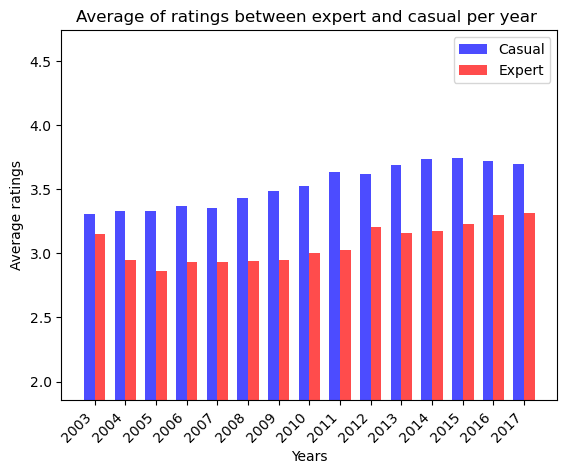

In [50]:
bar_width = 0.35
fig, ax = plt.subplots()

bar_positions1 = np.arange(len(avg_ratings_expert))
bar_positions2 = bar_positions1 + bar_width

ax.bar(bar_positions1, avg_ratings_normal, width=bar_width, label='Casual', color='blue', alpha=0.7)
ax.bar(bar_positions2, avg_ratings_expert, width=bar_width, label='Expert', color='red', alpha=0.7)

ax.set_xlabel('Years')
ax.set_ylabel('Average ratings')
ax.set_title('Average of ratings between expert and casual per year ')
ax.set_xticks(bar_positions1 + bar_width / 2)
ax.set_xticklabels(interest_years, rotation=45, ha='right')

y_min = min(min(avg_ratings_normal), min(avg_ratings_expert)) - 1 
y_max = max(max(avg_ratings_normal), max(avg_ratings_expert)) + 1 
ax.set_ylim(y_min, y_max)
ax.legend()

plt.show()

The plot shows that the user considered as expert tend to be more severe concerning the global rating of a beer.

## 2. g)

Try to find and analyse some beers which have been initially only been rated by expert then by casual in the next years (vice-versa) in order to identify if an expert tends to influence the ratings or not

Step 1: Find all beers which have been rated by both casual and expert

In [11]:
# Retrieve the ids of all expert user
expert_user_id = df_ratings_stat_expert[df_ratings_stat_expert.is_expert].user_id
# Separate ratings in expert and casual
df_expert_ratings = df_ratings_stat[df_ratings_stat['user_id'].isin(expert_user_id)]
df_casual_ratings = df_ratings_stat[~df_ratings_stat['user_id'].isin(expert_user_id)]

In [12]:
# Find all beer that has been rated at least once by an expert
beer_rated_by_expert = df_expert_ratings['beer_id'].unique()
# Find all beer that has been rated at least once by a casual
beer_rated_by_casual = df_casual_ratings['beer_id'].unique()

In [13]:
print(f'Total of different beer rated on the both websites : {len(df_ratings_stat.beer_id.unique())}')
print(f'expert have rated {len(beer_rated_by_expert)} different beers')
print(f'casual user have rated {len(beer_rated_by_casual)} different beers')

beer_ids_rated_by_both = list(set(beer_rated_by_casual).intersection(set(beer_rated_by_expert)))
print(f'intersection, number of beers which have been rated by casual and expert : {len(beer_ids_rated_by_both)}')

Total of different beer rated on the both websites : 447151
expert have rated 181862 different beers
casual user have rated 434476 different beers
intersection, number of beers which have been rated by casual and expert : 169187


Step 2: Find all beers which have been rated by an expert and a user not the same year

In [14]:
# only take beers which have been rated by both
beer_rated_by_expert_filtered = df_expert_ratings[df_expert_ratings['beer_id'].isin(beer_ids_rated_by_both)]
beer_rated_by_casual_filtered = df_casual_ratings[df_casual_ratings['beer_id'].isin(beer_ids_rated_by_both)]

In [15]:
# Add column is_expert to both dataframe
beer_rated_by_expert_filtered['is_expert'] = True
beer_rated_by_casual_filtered['is_expert'] = False

C:\Users\ylaar\AppData\Local\Temp\ipykernel_17048\3399824987.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beer_rated_by_expert_filtered['is_expert'] = True
C:\Users\ylaar\AppData\Local\Temp\ipykernel_17048\3399824987.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beer_rated_by_casual_filtered['is_expert'] = False


In [56]:
# Only take beers which have not been rated simultaneously by a casual and expert
# Merge DataFrames and identify which rows are unique to each DataFrame
merged_expert_casual = pd.merge(beer_rated_by_expert_filtered[['beer_id', 'rating', 'year', 'is_expert']], 
                                beer_rated_by_casual_filtered[['beer_id', 'rating', 'year', 'is_expert']],
                                on=['beer_id', 'year'],
                                how='outer',
                                indicator=True)

# Filter rows that are unique to each DataFrame
result_expert_casual = merged_expert_casual[merged_expert_casual['_merge'] != 'both']

# Drop the '_merge' column
result_expert_casual = result_expert_casual.drop(columns=['_merge'])

# add unique is_expert column to the result dataframe 
result_expert_casual['is_expert'] = np.where(~result_expert_casual['is_expert_x'].isna(), result_expert_casual['is_expert_x'], result_expert_casual['is_expert_y'])

# add unique rating column to the result dataframe 
result_expert_casual['rating'] = np.where(~result_expert_casual['rating_x'].isna(), result_expert_casual['rating_x'], result_expert_casual['rating_y'])

# delete unnecessary columns
result_expert_casual = result_expert_casual.drop(columns=['is_expert_x', 'is_expert_y', 'rating_x', 'rating_y'])

result_expert_casual

,beer_id,year,is_expert,rating
1168,36,2000,True,4.47
1169,36,2000,True,3.00
1260,79,1998,True,4.35
1494,306,1998,True,1.60
1495,302,1998,True,3.65
...,...,...,...,...
24247930,86571,2008,False,3.20
24247931,86570,2008,False,4.50
24247932,86572,2008,False,4.40
24247933,66161,2008,False,3.40


In [57]:
# Only take data after 2002 as we don't have enough data about who is expert or not before 2003
result_expert_casual_filtered = result_expert_casual.query('year > 2002')

In [67]:
# Calculate the count of is_expert=True for each beer
expert_count = result_expert_casual_filtered[result_expert_casual_filtered['is_expert'] == True].groupby('beer_id').size().reset_index(name='expert_count')

# Find the beer_id with the maximum count of is_expert=True
max_expert_beer = expert_count.loc[expert_count['expert_count'].idxmax(), 'beer_id']

# Display the result
print(f'Beer id with the most ratings over the years by expert while casual rated this beer some other year where expert did not : {max_expert_beer}')

Beer id with the most ratings over the years by expert while casual rated this beer some other year where expert did not : 31108


In [70]:
max_expert_beer_name = df_ratings_stat[df_ratings_stat['beer_id'] == max_expert_beer].iloc[0][0]
max_expert_beer_name

'Mocha Java Double Brown'

In [63]:
result_expert_casual_filtered[result_expert_casual_filtered['beer_id'] == max_expert_beer].groupby(['year', 'is_expert'])['rating'].count()

year  is_expert
2004  False        2
2007  True         4
2008  False        1
2009  True         7
2011  False        1
2012  False        1
2013  False        3
2014  True         2
2015  False        1
2016  False        1
Name: rating, dtype: int64

In [73]:
# Calculate the count of is_expert=False for each beer
non_expert_count = result_expert_casual_filtered[result_expert_casual_filtered['is_expert'] == False].groupby('beer_id').size().reset_index(name='non_expert_count')

# Find the beer_ids with at least 1 observation where is_expert=True
at_least_one_expert = result_expert_casual_filtered[result_expert_casual_filtered['is_expert'] == True]['beer_id'].unique()

# Filter non_expert_count to include only those with at least 1 is_expert=True
casual_count_filtered = non_expert_count[non_expert_count['beer_id'].isin(at_least_one_expert)]

# Find the beer_id with the maximum count of is_expert=False
max_casual_beer = casual_count_filtered.loc[casual_count_filtered['non_expert_count'].idxmax(), 'beer_id']

# Display the result
print(f'Beer id with the most ratings over the years by casuals while experts rated this beer some other year where casuals did not : {max_casual_beer}')

Beer id with the most ratings over the years by casuals while experts rated this beer some other year where casuals did not : 99873


In [66]:
result_expert_casual_filtered[result_expert_casual_filtered['beer_id'] == max_casual_beer].groupby(['year', 'is_expert'])['rating'].count()

year  is_expert
2009  False           4
2011  True            1
2012  False           2
2013  False        1534
2014  False        3747
2016  False         291
2017  False          85
Name: rating, dtype: int64

In [117]:
max_casual_beer_name = df_ratings_stat[df_ratings_stat['beer_id'] == max_casual_beer].iloc[0][0]
max_casual_beer_name

'DirtWolf'

Plot rating of beer 'Mocha Java Double Brown' and 'DirtWolf' by casual and expert over years where these beers were rated

In [88]:
df_max_expert_beer = result_expert_casual_filtered[result_expert_casual_filtered['beer_id'] == max_expert_beer].groupby(['year', 'is_expert'])['rating'].mean().reset_index()
df_max_expert_beer

,year,is_expert,rating
0,2004,False,3.350000
1,2007,True,2.850000
2,2008,False,3.100000
3,2009,True,3.000000
4,2011,False,2.500000
5,2012,False,1.800000
6,2013,False,2.766667
7,2014,True,3.150000
8,2015,False,4.060000
9,2016,False,2.900000


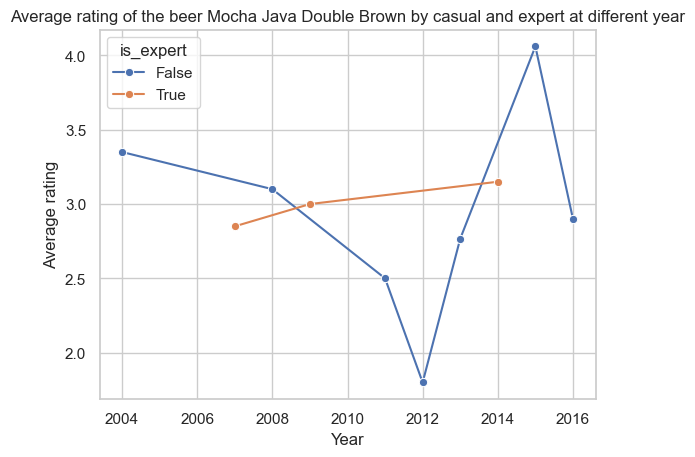

In [103]:
sns.set(style="whitegrid")
sns.lineplot(data=df_max_expert_beer, x='year', y='rating', hue='is_expert', marker='o')
plt.xlabel('Year')
plt.ylabel('Average rating')
plt.title(f'Average rating of the beer {max_expert_beer_name} by casual and expert at different year')
plt.show()

different way to plot it, which is the best ?

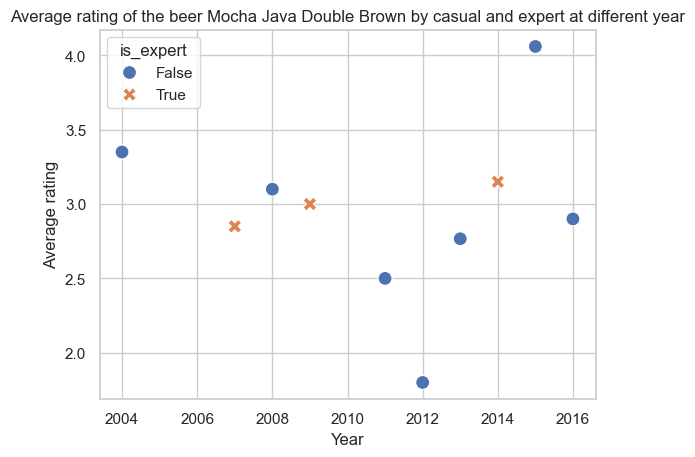

In [115]:
sns.set(style="whitegrid")
sns.scatterplot(data=df_max_expert_beer, x='year', y='rating', hue='is_expert', style='is_expert', s=100)
plt.xlabel('Year')
plt.ylabel('Average rating')
plt.title(f'Average rating of the beer {max_expert_beer_name} by casual and expert at different year')
plt.show()

In [116]:
df_max_casual_beer = result_expert_casual_filtered[result_expert_casual_filtered['beer_id'] == max_casual_beer].groupby(['year', 'is_expert'])['rating'].mean().reset_index()
df_max_casual_beer

,year,is_expert,rating
0,2009,False,3.450000
1,2011,True,3.400000
2,2012,False,3.300000
3,2013,False,4.302308
4,2014,False,4.280363
5,2016,False,4.197938
6,2017,False,4.172706


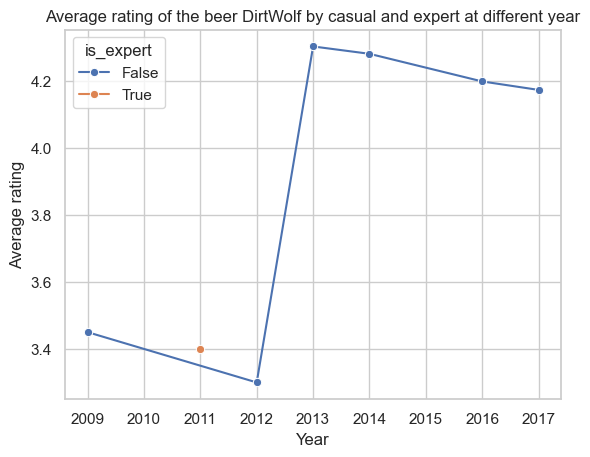

In [119]:
sns.set(style="whitegrid")
sns.lineplot(data=df_max_casual_beer, x='year', y='rating', hue='is_expert', marker='o')
plt.xlabel('Year')
plt.ylabel('Average rating')
plt.title(f'Average rating of the beer {max_casual_beer_name} by casual and expert at different year')
plt.show()

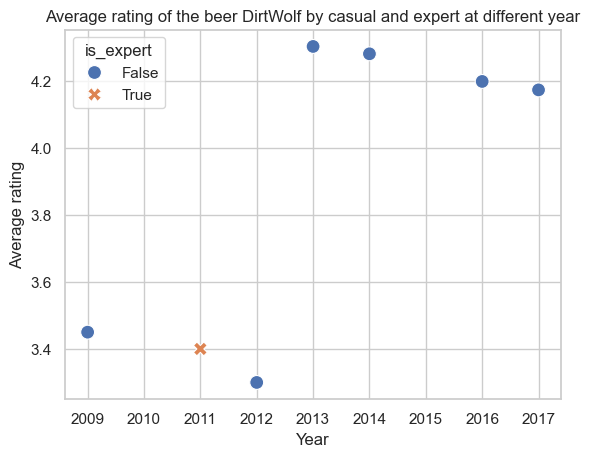

In [120]:
sns.set(style="whitegrid")
sns.scatterplot(data=df_max_casual_beer, x='year', y='rating', hue='is_expert', style='is_expert', s=100)
plt.xlabel('Year')
plt.ylabel('Average rating')
plt.title(f'Average rating of the beer {max_casual_beer_name} by casual and expert at different year')
plt.show()